## Sobel Filter to compute magnitude & edge.

###  Implement SobelImage(image) to compute edge magnitude and orientation information. SobelImage should display the magnitude and orientation of the edges in an image

In [1]:
from scipy.misc import imread
import scipy as sc
from scipy import ndimage
from skimage import filters
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.color import rgb2gray
from scipy.misc import imsave



In [2]:
def convolution(oldimage, kernel):
    #image = Image.fromarray(image, 'RGB')
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            
            
#             for m in range(kernel_h):
#                 for n in range(kernel_w):
#                     sum += kernel[m][n] * image_pad[i-h+m][j-w+n]
            
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]

    return image_conv[h:h_end,w:w_end]
    
                    

In [3]:
def SobelImage(image):
    image = Image.open(image).convert('L')
    image = np.asarray(image)
    
    im_filtered = np.zeros_like(image, dtype=np.float32)
    
    X = convolution(image, np.array([[-1,-2,-1],[0,0,0],[1,2,1]]))
    Y = convolution(image, np.array([[-1,0,1],[-2,0,2],[-1,0,1]]))
    
    magnitude = np.sqrt(X**2 + Y**2)
    
    
    orientation = np.arctan(Y , X)
    
    
    return (magnitude.astype(np.uint8), orientation.astype(np.uint8))
    

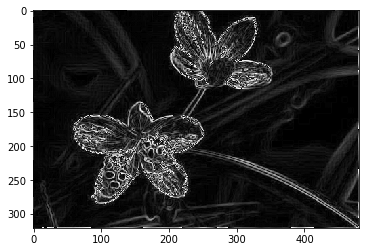

In [4]:
a = SobelImage('hw1_data/LadyBug.jpg')[0]
plt.imshow(a, cmap='gray')
plt.imsave('5a.png', a, cmap = 'gray')

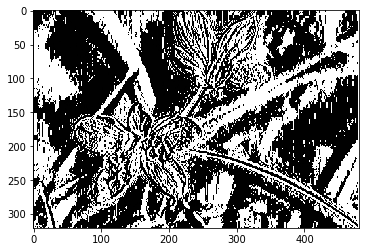

In [5]:
a = SobelImage('hw1_data/LadyBug.jpg')[1]
plt.imshow(a, cmap= 'gray')
plt.imsave('5b.png',a, cmap= 'gray')